In [1]:
using Revise
using SSM
using Distributions
using ForwardDiff
using LinearAlgebra
using Random
using StatsFuns
using SpecialFunctions
using Test

include("../../helper_functions.jl")
include("../HiddenMarkovModels.jl")

test_HiddenMarkovModel_E_step (generic function with 1 method)

## Gaussian HMM

In [2]:
# create a Gaussian HMM
Random.seed!(123)

input_dim = 2
output_dim = 2
n = 1000

μ = [0.0, 0.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = Gaussian(output_dim=output_dim, μ=μ, Σ=Σ)

μ = [2.0, 1.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

μ = [-1.0, 2.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_3 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

# make the HMM
hmm = HiddenMarkovModel(K=3, B=[emission_1, emission_2, emission_3])
hmm.πₖ = [1.0, 0, 0]
hmm.A = [0.9 0.05 0.05; 0.05 0.9 0.05; 0.05 0.05 0.9]

3×3 Matrix{Float64}:
 0.9   0.05  0.05
 0.05  0.9   0.05
 0.05  0.05  0.9

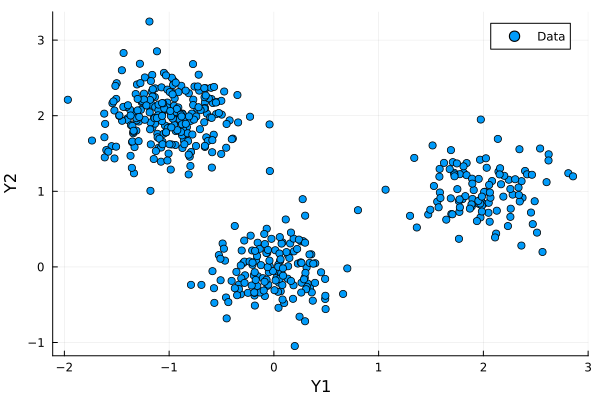

In [3]:
# generate some data
state_sequence, Y = SSM.sample(hmm, n=n)

# plot the data
using Plots
plot(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")

In [4]:
# fit the model
μ = [-0.1, 0.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = Gaussian(output_dim=output_dim, μ=μ, Σ=Σ)

μ = [1.5, 1.2]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

μ = [-1.1, 2.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_3 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

# make the HMM
est_model = HiddenMarkovModel(K=3, B=[emission_1, emission_2, emission_3])

HiddenMarkovModel([0.2629355467255036 0.1492087280775873 0.5878557251969091; 0.30035454792371247 0.1134758217841045 0.586169630292183; 0.29798974547249685 0.3315089615888481 0.3705012929386551], EmissionModel[GaussianEmission(Gaussian(2, [-0.1, 0.0], [0.1 0.0; 0.0 0.1])), GaussianEmission(Gaussian(2, [1.5, 1.2], [0.1 0.0; 0.0 0.1])), GaussianEmission(Gaussian(2, [-1.1, 2.0], [0.1 0.0; 0.0 0.1]))], [0.1293302943669866, 0.603699030450075, 0.2669706751829386], 3)

In [5]:
# fit the model
fit!(est_model, Y)

Running EM algorithm...   2%|█                           |  ETA: 0:01:52

Running EM algorithm... 100%|████████████████████████████| Time: 0:00:03


In [6]:
# print both models parameters
println("True model")

println("π: ", hmm.πₖ)
println("A: ", hmm.A)

println("Emissions")
for emission in hmm.B
    println("μ: ", emission.μ)
    println("Σ: ", emission.Σ)
end

println("Estimated model")

println("π: ", est_model.πₖ)
println("A: ", est_model.A)

println("Emissions")
for emission in est_model.B
    println("μ: ", emission.μ)
    println("Σ: ", emission.Σ)
end


True model
π: [1.0, 0.0, 0.0]
A: [0.9 0.05 0.05; 0.05 0.9 0.05; 0.05 0.05 0.9]
Emissions
μ: [0.0, 0.0]
Σ: [0.1 0.0; 0.0 0.1]
μ: [2.0, 1.0]
Σ: [0.1 0.0; 0.0 0.1]
μ: [-1.0, 2.0]
Σ: [0.1 0.0; 0.0 0.1]
Estimated model
π: [1.0, 1.1682736861890086e-32, 1.069019226133184e-39]
A: [0.8970002257543764 0.036551022712581156 0.06644875153304304; 0.041360045746764544 0.8883926727435674 0.07024728150966353; 0.043843474811546636 0.03510644235747681 0.9210500828309783]
Emissions
μ: [0.012713933275025265, -0.02460209552436724]
Σ: [0.102957683782293 0.002075769323721045; 0.002075769323721045 0.10074671074763987]
μ: [1.9947343346202002, 1.026980339339866]
Σ: [0.1056066157647885 -0.006439666990351939; -0.006439666990351939 0.09549508230848752]
μ: [-0.9989253569940216, 1.9952684480774108]
Σ: [0.10268206511100553 -0.003281875317578031; -0.003281875317578031 0.09645107765371734]


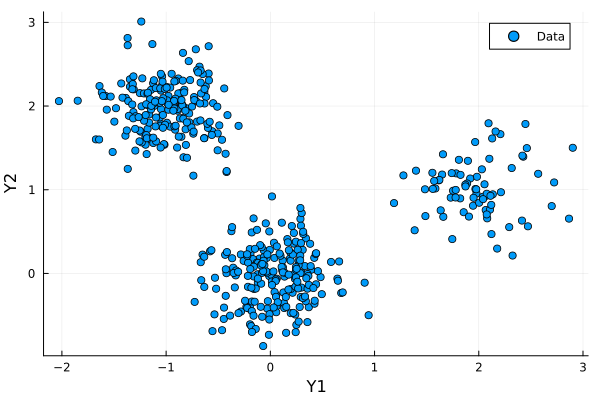

In [7]:
# sample from the est_model and plot the data

state_sequence, Y = SSM.sample(est_model, n=n)

# plot the data
plot(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")

## GaussianRegression HMM

In [8]:
# set random seed
Random.seed!(124)

input_dim = 2
output_dim = 2
n = 1000

β = [-10.0 2; 0 -1; 1 1]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = GaussianRegression(input_dim=input_dim, output_dim=output_dim, β=β, Σ=Σ)

β =  [10.0 0; 1 0; 0 1]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = GaussianRegression(input_dim=input_dim, output_dim=output_dim, β=β, Σ=Σ)

β = [5.0 10; 2 0; 0 1]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_3 = GaussianRegression(input_dim=input_dim, output_dim=output_dim, β=β, Σ=Σ)

# make the HMM
true_model = HiddenMarkovModel(K=3, B=[emission_1, emission_2, emission_3])
true_model.πₖ = [.4, 0.3, 0.3]
true_model.A = [0.8 0.1 0.1; 0.1 0.8 0.1; 0.1 0.1 0.8]


Φ = randn(n, 2)
states, Y = SSM.sample(true_model, Φ, n=n)

([2, 2, 2, 1, 1, 1, 1, 1, 3, 3  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [11.616438349223733 0.2547146461078145; 10.264763562777047 0.9095685059505345; … ; -10.757019804248257 1.2420361760175203; -11.37683960853237 0.7772520106584795])

In [9]:
# count how many 1s, 2s, and 3s there are in states
count = zeros(3)

for i in 1:n
    count[states[i]] += 1
end

println(count)

[402.0, 352.0, 246.0]


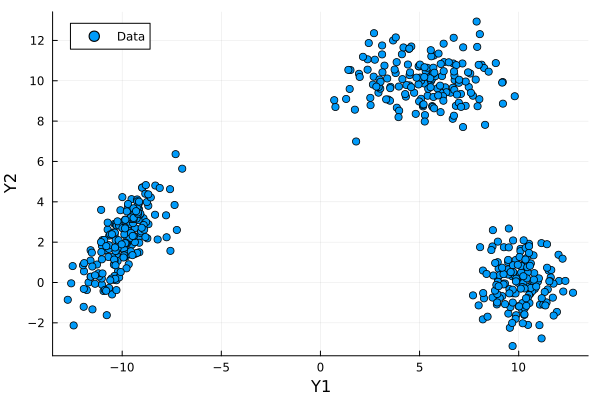

In [10]:
# plot the first 50 data points

using Plots
plot(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")


In [11]:
println(true_model.B[2])
println(emission_loglikelihood(true_model.B[2], Y, Φ))

SSM.GaussianRegressionEmission(GaussianRegression(2, 2, [10.0 0.0; 1.0 0.0; 0.0 1.0], [0.1 0.0; 0.0 0.1], true, 0.0))
[-2040.0622961537272, -1878.7367570119532, -2000.4478532472917, -10.970882888874051, -46.20717431953393, -35.70809021939815, -35.2070009247639, -11.40283182354479, -1872.0677513265452, -1386.740474948341, -1649.836695159485, -1644.2289261757783, -1808.3382957196502, -2042.439443378509, -1884.9491875031474, -2145.833266084691, -1522.2241664413004, -1594.006726179324, -1666.8666586663642, -1337.5610624508624, -1501.3113026607095, -1746.3543454863045, -1698.946991323393, -1994.7019031199604, -75.21883714998943, -2.7652739993045974, -19.916002939639533, -40.88166338440226, -39.71520730992549, -33.41026970511935, -15.51390782878547, -36.89143998228459, -10.769802314728057, -24.42384800291136, -1982.3815748072498, -32.42933484590196, -83.81262370272898, -36.40022172695272, -81.2823867304841, -86.58556933454713, -20.994607921477755, -44.92585908160564, -24.388152802323745, -14

In [12]:
# Calculate observation wise likelihoods for all states
println("Φ: ", Φ[1:10, :])
println("Y: ", Y[1:10, :])

loglikelihoods_state_1 = emission_loglikelihood(true_model.B[1], Φ, Y)
loglikelihoods = zeros(true_model.K, length(loglikelihoods_state_1))
loglikelihoods[1, :] = loglikelihoods_state_1

println("emission_1: ", true_model.B[1])

println(loglikelihoods[1, 1:10])

for k in 2:true_model.K
    loglikelihoods[k, :] = emission_loglikelihood(true_model.B[k], Φ, Y)
end

println(loglikelihoods[2, 1:10])

Φ: [1.4193706344070682 0.24641690353920462; 0.8836603462743893 1.0808676954902248; -0.1507006259882361 1.403006000600507; 1.2174349622756384 2.2761712037629596; 0.053540376968048066 -1.4500294901433473; -0.32281592914192647 0.8808864845237196; -0.39944977118225705 -1.5956182615785772; 0.8781121173263741 -0.5799064247315776; 1.5456084047313259 0.8309214533540193; -1.1596144185018182 2.257904576874105]
Y: [11.616438349223733 0.2547146461078145; 10.264763562777047 0.9095685059505345; 9.847174120123295 1.1136443117594084; -7.786359960614808 3.330166422344128; -11.598890596095016 1.0837543684058868; -9.060069810195316 3.2167469644413256; -11.926242784549745 0.5536739888985451; -10.416088347953279 0.1375651210839297; 8.128497449661307 10.797389989777853; 2.436597887391266 11.870409964202928]
emission_1: SSM.GaussianRegressionEmission(GaussianRegression(2, 2, [-10.0 2.0; 0.0 -1.0; 1.0 1.0], [0.1 0.0; 0.0 0.1], true, 0.0))
[-2285.4811308852713, -1848.85360269457, -1731.160439113975, -0.8421529

In [13]:
# take Φ and Y, then use the true_model to estimate the states

println("True state: ", states[1:50])

# calculate the class probabilities
class_probs = class_probabilities(true_model, Φ, Y)

# each row i of class_probs is a vector of probabilities for the ith observation
# get the most likely class for each observation
most_likely_class = argmax(class_probs, dims=2)
# convert the most likely class to a vector of integers

most_likely_class = [ x[2] for x in Tuple.(most_likely_class)]

println("Pred state: ", most_likely_class[1:50])

println("")

True state: [2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Pred state: [2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



In [14]:
most_likely_class = [ x[2] for x in Tuple.(most_likely_class)]

# count how many 1s, 2s, and 3s there are in most_likely_class
count = zeros(3)

for i in 1:n
    count[most_likely_class[i]] += 1
end

println(count)

BoundsError: BoundsError: attempt to access Tuple{Int64} at index [2]

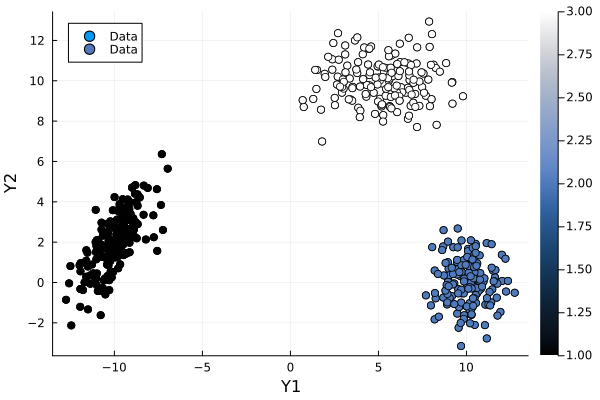

In [15]:
# plot the data again, with color corresponding to the most likely class
plot!(Y[1:500, 1], Y[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2", zcolor=most_likely_class[1:500], color=:oslo)

In [16]:
β = [-8.0 5; 0 -3; 1 1]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = GaussianRegression(input_dim=input_dim, output_dim=output_dim, β=β, Σ=Σ, λ=0.1)

β =  [5.0 0; 1 0.5; 0 1]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = GaussianRegression(input_dim=input_dim, output_dim=output_dim, β=β, Σ=Σ, λ=0.1)

β = [9.0 9; 2 0; 1 1]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_3 = GaussianRegression(input_dim=input_dim, output_dim=output_dim, β=β, Σ=Σ, λ=0.1)


# make the HMM
est_model = HiddenMarkovModel(K=3, B=[emission_1, emission_2, emission_3])

# give the est_model a complete cheat
est_model.πₖ = true_model.πₖ
est_model.A = true_model.A



3×3 Matrix{Float64}:
 0.8  0.1  0.1
 0.1  0.8  0.1
 0.1  0.1  0.8

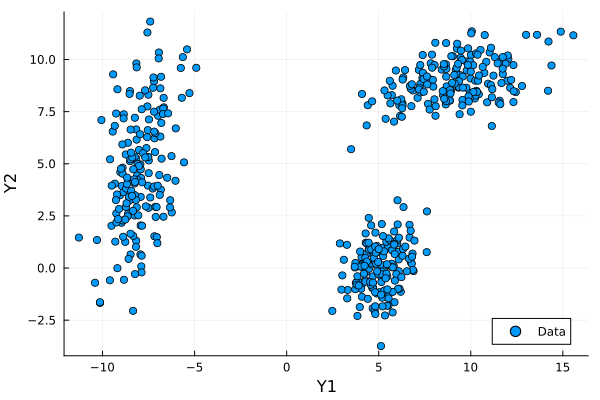

In [17]:
states_new, Y_new = SSM.sample(est_model, Φ, n=n)
plot(Y_new[1:500, 1], Y_new[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")

In [18]:
fit!(est_model, Φ, Y, max_iters=100)

Running EM algorithm...   2%|█                           |  ETA: 0:02:26

Running EM algorithm... 100%|████████████████████████████| Time: 0:00:03


Covariance matrix: [0.037781745356078984 -0.0011916002087226892; -0.0011916002087226892 0.04437521202714393]
Covariance matrix: [0.035514603479365976 -0.00029835463446308604; -0.00029835463446308604 0.03566979100988284]
Covariance matrix: [0.025421494049515048 -0.0006050711812171407; -0.0006050711812171407 0.02389234658085106]
Covariance matrix: [0.037781745356078984 -0.0011916002087226892; -0.0011916002087226892 0.04437521202714393]
Covariance matrix: [0.035514603479365976 -0.00029835463446308604; -0.00029835463446308604 0.03566979100988284]
Covariance matrix: [0.025421494049515048 -0.0006050711812171407; -0.0006050711812171407 0.02389234658085106]


In [19]:
function compare()
    # compare true and estimated parameters by printing them out
    println("True model:")
    println("A: ", true_model.A)
    println("B[1].β: ", true_model.B[1].β)
    println("B[1].Σ: ", true_model.B[1].Σ)
    println("B[2].β: ", true_model.B[2].β)
    println("B[2].Σ: ", true_model.B[2].Σ)
    println("B[3].β: ", true_model.B[3].β)
    println("B[3].Σ: ", true_model.B[3].Σ)


    println("πₖ: ", true_model.πₖ)
    println("loglikelihood: ", SSM.loglikelihood(true_model, Φ, Y))

    println("Estimated model:")
    println("A: ", est_model.A)
    println("B[1].β: ", est_model.B[1].β)
    println("B[1].Σ: ", est_model.B[1].Σ)
    println("B[2].β: ", est_model.B[2].β)
    println("B[2].Σ: ", est_model.B[2].Σ)
    println("B[3].β: ", est_model.B[3].β)
    println("B[3].Σ: ", est_model.B[3].Σ)

    println("πₖ: ", est_model.πₖ)
    println("loglikelihood: ", SSM.loglikelihood(est_model, Φ, Y))
end
compare()

True model:
A: [0.825436408977556 0.09226932668329174 0.0822942643391521; 0.11363636363636367 0.7982954545454545 0.08806818181818185; 0.12601626016260167 0.13414634146341467 0.7398373983739839]
B[1].β: [-10.0 2.0; 0.0 -1.0; 1.0 1.0]
B[1].Σ: [0.1 0.0; 0.0 0.1]
B[2].β: [10.0 0.0; 1.0 0.0; 0.0 1.0]
B[2].Σ: [0.1 0.0; 0.0 0.1]
B[3].β: [5.0 10.0; 2.0 0.0; 0.0 1.0]
B[3].Σ: [0.1 0.0; 0.0 0.1]
πₖ: [0.0, 1.0, 0.0]
loglikelihood: -2120.576522449562
Estimated model:
A: [0.825436408977556 0.09226932668329174 0.0822942643391521; 0.11363636363636367 0.7982954545454545 0.08806818181818185; 0.12601626016260167 0.13414634146341467 0.7398373983739839]
B[1].β: [-10.012474385232727 2.0045501067783325; -0.026518824679121134 -0.9944969174916461; 1.0189374970825142 1.0095969284003312]
B[1].Σ: [0.037781745356078984 -0.0011916002087226892; -0.0011916002087226892 0.04437521202714393]
B[2].β: [9.981660116249394 0.004529350491890892; 1.0104926183766962 0.0037415404203881095; -0.007313031682726392 1.008129539572875

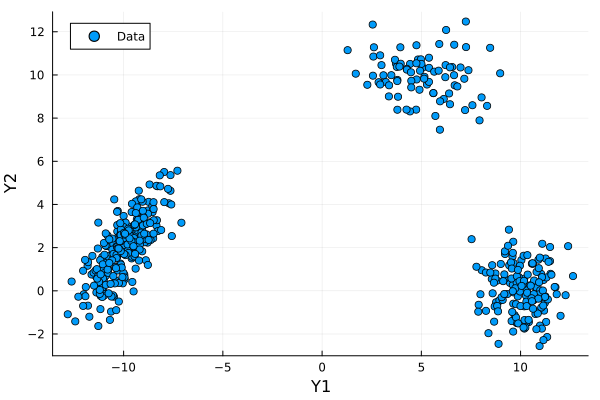

In [20]:
# sample from est_model
states_new, Y_new = SSM.sample(est_model, Φ, n=n)
plot(Y_new[1:500, 1], Y_new[1:500, 2], seriestype = :scatter, label="Data", xlabel="Y1", ylabel="Y2")

In [21]:

# test AR HMM 

output_dim = 2
order = 1

# make a rotation matrix for pi/20 radians
θ = π/20
β = [cos(θ) -sin(θ); sin(θ) cos(θ)] 
Σ = 0.001 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = AutoRegression(order=order, output_dim=output_dim, β=β, Σ=Σ, include_intercept=false)

# make a rotation matrix for -pi/10 radians
θ = -π/10
β = [cos(θ) -sin(θ); sin(θ) cos(θ)] 
Σ = 0.001 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = AutoRegression(order=order, output_dim, output_dim, β=β, Σ=Σ, include_intercept=false)

# make the HMM
true_model = HiddenMarkovModel(K=2, B=[emission_1, emission_2])
true_model.πₖ = [1.0, 0]
true_model.A = [0.9 0.1; 0.1 0.9]

Y_prev = reshape([1.0, 0.0], 1, :)

# sample data
n = 1000
states, Y = SSM.sample(true_model, Y_prev, n=n)
println("states: ", states[1:10])
println("Y: ", Y[1:10, :])

MethodError: MethodError: no method matching AutoRegression(::Int64, ::Int64; order::Int64, β::Matrix{Float64}, Σ::Matrix{Float64}, include_intercept::Bool)

Closest candidates are:
  AutoRegression(::Int64, ::Int64, !Matched::GaussianRegression) got unsupported keyword arguments "order", "β", "Σ", "include_intercept"
   @ SSM c:\Users\carso\OneDrive\Desktop\DePasquale\Ryan\ssm_julia\src\RegressionModels.jl:816
  AutoRegression(::Any, ::Any, !Matched::Any) got unsupported keyword arguments "order", "β", "Σ", "include_intercept"
   @ SSM c:\Users\carso\OneDrive\Desktop\DePasquale\Ryan\ssm_julia\src\RegressionModels.jl:816


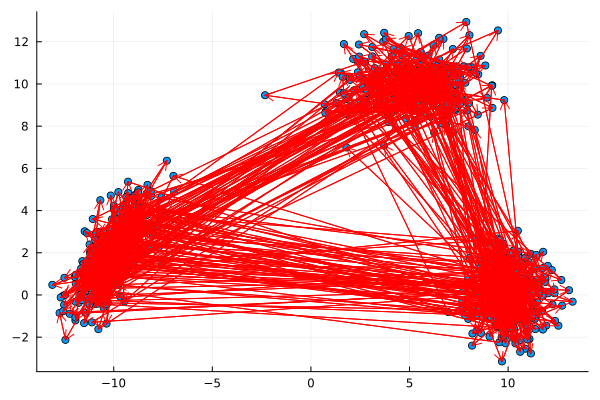

In [22]:
# plot the data with arrows connecting consecutive points
using Plots

plot(Y[:, 1], Y[:, 2], seriestype=:scatter, legend=false)
quiver!(Y[1:end-1, 1], Y[1:end-1, 2], quiver=(Y[2:end, 1] - Y[1:end-1, 1], Y[2:end, 2] - Y[1:end-1, 2]), color=:red)



In [23]:

# fit an est_model
# make a rotation matrix for pi/20 radians
θ = π/5
β = [cos(θ) -sin(θ); sin(θ) cos(θ)] 
Σ = 0.01 * Matrix{Float64}(I, output_dimimimoutput_dimimimimimim)

emission_1 = AutoRegression(order=order, output_dimimioutput_dimimimimim, β=β, Σ=Σ, include_intercept=false)

# make a rotation matrix for -pi/10 radians
θ = -π/9
β = [cos(θ) -sin(θ); sin(θ) cos(θ)] 
Σ = 0.01 * Matrix{Float64}(I, output_dimimimimoutput_dimimimimim)

emission_2 = AutoRegression(order=order, output_dimimioutput_dimimimimim, β=β, Σ=Σ, include_intercept=false)

est_model = HiddenMarkovModel(K=2, B=[emission_1, emission_2])
fit!(est_model, Y_prev, Y)


UndefVarError: UndefVarError: `output_dimimimoutput_dimimimimimim` not defined

In [24]:
function compare()
    # compare true and estimated parameters by printing them out
    println("True model:")
    println("A: ", true_model.A)
    println("B[1].β: ", true_model.B[1].β)
    println("B[2].β: ", true_model.B[2].β)
    println("πₖ: ", true_model.πₖ)
    println("loglikelihood: ", SSM.loglikelihood(true_model, Y_prev, Y))

    println("Estimated model:")
    println("A: ", est_model.A)
    println("B[1].β: ", est_model.B[1].β)
    println("B[2].β: ", est_model.B[2].β)
    println("πₖ: ", est_model.πₖ)
    println("loglikelihood: ", SSM.loglikelihood(est_model, Y_prev, Y))
end

compare()



True model:
A: [0.825436408977556 0.09226932668329174 0.0822942643391521; 0.11363636363636367 0.7982954545454545 0.08806818181818185; 0.12601626016260167 0.13414634146341467 0.7398373983739839]
B[1].β: [-10.0 2.0; 0.0 -1.0; 1.0 1.0]
B[2].β: [10.0 0.0; 1.0 0.0; 0.0 1.0]
πₖ: [0.0, 1.0, 0.0]


UndefVarError: UndefVarError: `Y_prev` not defined

In [25]:
# generate new data from the est_model and plot it with the arrows
states_new, Y_new = SSM.sample(est_model, Y_prev, n=n)
plot(Y_new[:, 1], Y_new[:, 2], seriestype=:scatter, legend=false)
quiver!(Y_new[1:end-1, 1], Y_new[1:end-1, 2], quiver=(Y_new[2:end, 1] - Y_new[1:end-1, 1], Y_new[2:end, 2] - Y_new[1:end-1, 2]), color=:red)

UndefVarError: UndefVarError: `Y_prev` not defined